***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE. 

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [2]:
dados = pd.read_csv('dados.csv', sep=',')


### Visualize o conteúdo do DataFrame

In [3]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [4]:
dados['Renda'].max()

200000

In [5]:
class_renda = [0,(788*2),(788*5),(788*15),(788*25),200000]
class_renda

[0, 1576, 3940, 11820, 19700, 200000]

### 2º Definir os labels das classes

In [6]:
labels_renda = ['E','D','C','B','A']

### 3º Construir a coluna de frequências

In [7]:
coluna_frequencia = pd.cut(x=dados['Renda'], bins=class_renda, labels=labels_renda, include_lowest=True)
coluna_frequencia.value_counts()

E    49755
D    18602
C     7241
B      822
A      420
Name: Renda, dtype: int64

### 4º Construir a coluna de percentuais

In [8]:
coluna_percent = coluna_frequencia.value_counts(normalize=True)*100
coluna_percent

E    64.751432
D    24.208745
C     9.423477
B     1.069755
A     0.546590
Name: Renda, dtype: float64

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [9]:
distribuicao_renda = pd.DataFrame({'Frequencia':coluna_frequencia.value_counts(),
                                   'Percentual (%)':coluna_percent})
distribuicao_renda.rename_axis('Index', axis='columns', inplace=True)
distribuicao_renda.sort_index(ascending=False, inplace=True)
distribuicao_renda.reset_index(level=0, inplace=True)
distribuicao_renda.rename(columns={'index':'Classe'}, inplace=True)
distribuicao_renda

Index,Classe,Frequencia,Percentual (%)
0,A,420,0.546590
1,B,822,1.069755
2,C,7241,9.423477
3,D,18602,24.208745
4,E,49755,64.751432


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

<AxesSubplot:xlabel='Frequencia', ylabel='Percentual (%)'>

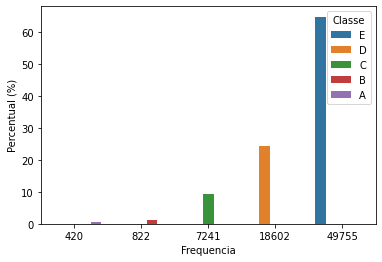

In [10]:
sns.barplot(x='Frequencia', y= 'Percentual (%)', hue='Classe', data=distribuicao_renda)

> ### Conclusões

A maioria das pessoas entrevistadas estão na Classe "E" ou seja recebem ate 2 salarios minimos e isso corresponde mas de 60% da nossa base de dados

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

C:\Users\caio_\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição de Frequências - Altura - KDE'}, xlabel='Metros', ylabel='Density'>

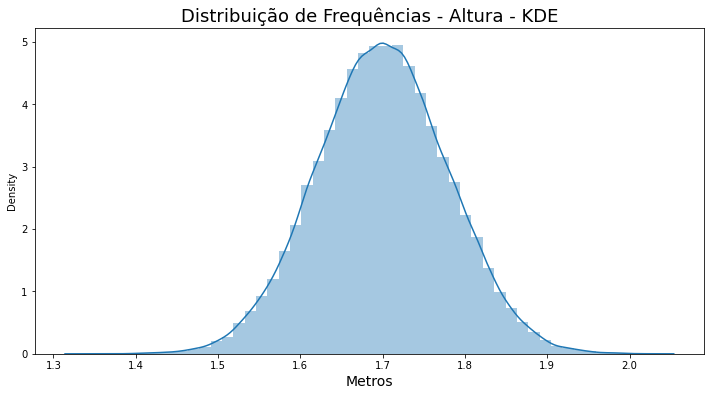

In [11]:
ax = sns.distplot(dados['Altura'])
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Frequências - Altura - KDE', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

C:\Users\caio_\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição de Frequências - Renda - KDE'}, xlabel='R$', ylabel='Density'>

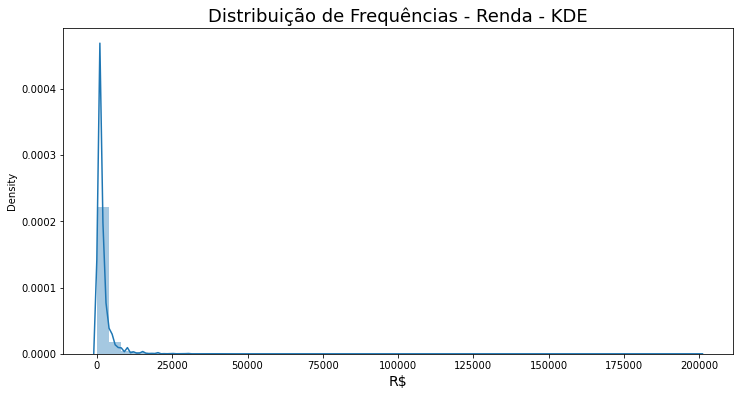

In [12]:
ax = sns.distplot(dados['Renda'])
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Frequências - Renda - KDE', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax

C:\Users\caio_\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição de Frequências - Anos de Estudo - KDE'}, xlabel='Anos', ylabel='Density'>

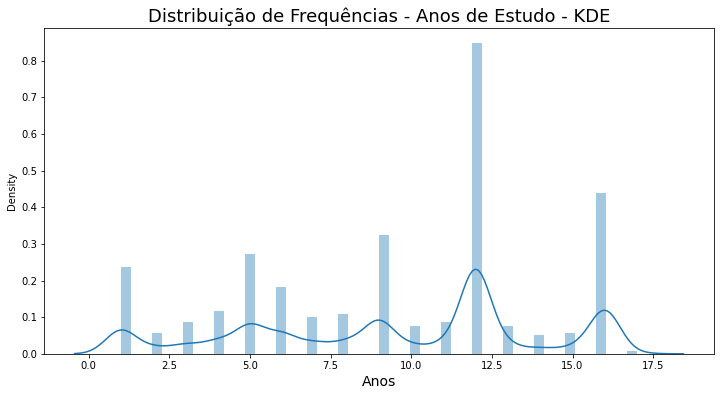

In [13]:
ax = sns.distplot(dados['Anos de Estudo'])
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Frequências - Anos de Estudo - KDE', fontsize=18)
ax.set_xlabel('Anos', fontsize=14)
ax

> ### Conclusões

Foi analisado 3 variáveis em nossos dados Altura, Renda e Anos de Estudo. Com essa analise previa podemos notar que:
Nossa Variável de Altura é Simétrica
Nossa Variável de de Renda é Assimetrica a direita
Nossa Variável de Anos de Estudo é Assimetrica a esquerda

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

C:\Users\caio_\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Renda')

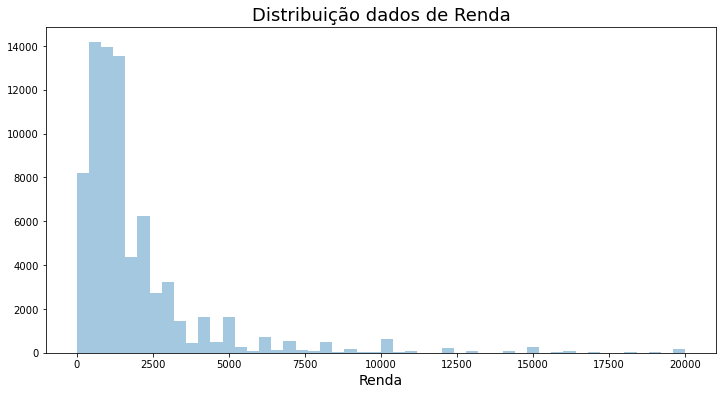

In [14]:
ax = sns.distplot(dados.query('Renda <= 20000')['Renda'], kde=False)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição dados de Renda', fontsize=18)
ax.set_xlabel('Renda', fontsize=14)

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [15]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

In [16]:
frequencia = pd.crosstab(dados['Sexo'], dados['Cor'])
frequencia.rename(index=sexo, inplace=True)
frequencia.rename(columns=cor, inplace=True)
frequencia

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [17]:
percentual = pd.crosstab(dados['Sexo'], dados['Cor'], normalize=True) *100
percentual.rename(index=sexo, inplace=True)
percentual.rename(columns=cor, inplace=True)
percentual

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


> ### Conclusões

Com base nas informação das variáveis analisada a maioria dos cheves de familia entrevistados são pardos do sexo masculino

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [18]:
dados['Renda'].mean()

2000.3831988547631

### Obtenha a mediana

In [19]:
dados['Renda'].median()

1200.0

### Obtenha a moda

In [20]:
dados['Renda'].mode()

0    788
dtype: int64

### Obtenha o desvio médio absoluto

In [21]:
dados['Renda'].abs()

0         800
1        1150
2         880
3        3500
4         150
         ... 
76835     812
76836    1500
76837    1300
76838    1500
76839     900
Name: Renda, Length: 76840, dtype: int64

### Obtenha a variância

In [22]:
dados['Renda'].var()

11044906.00622118

### Obtenha o desvio-padrão

In [23]:
dados['Renda'].std()

3323.3877303470294

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [24]:
dados_renda = pd.crosstab(dados['Sexo'], dados['Cor'], values=dados['Renda'], aggfunc={'mean', 'median','max'})
dados_renda.rename(index=sexo, inplace=True)
dados_renda.rename(columns=cor, inplace=True)
dados_renda

max                                               mean  \
Cor        Indígena    Branca    Preta  Amarela     Parda     Indígena   
Sexo                                                                     
Masculino   10000.0  200000.0  50000.0  50000.0  100000.0  1081.710938   
Feminino   120000.0  100000.0  23000.0  20000.0   30000.0  2464.386139   

                                                                median  \
Cor             Branca        Preta      Amarela        Parda Indígena   
Sexo                                                                     
Masculino  2925.744435  1603.861687  4758.251064  1659.577425    797.5   
Feminino   2109.866750  1134.596400  3027.341880  1176.758516    788.0   

                                           
Cor        Branca   Preta Amarela   Parda  
Sexo                                       
Masculino  1700.0  1200.0  2800.0  1200.0  
Feminino   1200.0   800.0  1500.0   800.0

In [25]:
#A media
dados_renda['mean']

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,1081.710938,2925.744435,1603.861687,4758.251064,1659.577425
Feminino,2464.386139,2109.866750,1134.596400,3027.341880,1176.758516


In [26]:
#A mediana
dados_renda['median']

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,797.5,1700.0,1200.0,2800.0,1200.0
Feminino,788.0,1200.0,800.0,1500.0,800.0


In [27]:
#O valor maximo
dados_renda['max']

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,10000.0,200000.0,50000.0,50000.0,100000.0
Feminino,120000.0,100000.0,23000.0,20000.0,30000.0


> ### Conclusões

Podemos notas que a media e mediana são bem equivalente mostrando que a distribuição de renda se concentra nos de pele "amarela" do sexo masculino, entretando quando vemos o valor maximo da renta temo o maior valor entre homens pardos e mulheres indigenas

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [28]:
dispersao = pd.crosstab(dados['Sexo'], dados['Cor'], values=dados['Renda'], aggfunc={'var','std','mad'})
dispersao.rename(index=sexo, inplace=True)
dispersao.rename(columns=cor, inplace=True)
dispersao

mad                                                     \
Cor           Indígena       Branca       Preta      Amarela        Parda   
Sexo                                                                        
Masculino   798.910889  2261.012346  975.602482  3709.597211  1125.827704   
Feminino   3007.892952  1670.967106  705.453357  2549.146322   811.580946   

                    std                                                     \
Cor            Indígena       Branca        Preta     Amarela        Parda   
Sexo                                                                         
Masculino   1204.093490  4750.791872  1936.309271  5740.82482  2312.087184   
Feminino   11957.498292  3251.013154  1349.799809  3731.17366  1596.233048   

                    var                                            \
Cor            Indígena        Branca         Preta       Amarela   
Sexo                                                                
Masculino  1.449841e+06  2.257002e+07  3.749294e+06  3.295707e+07   
Feminino   1.429818e+08  1.056909e+07  1.821960e+06  1.392166e+07   

                         
Cor               Parda  
Sexo                     
Masculino  5.345747e+06  
Feminino   2.547960e+06

In [29]:
#Media absoluta
dispersao['mad']

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,798.910889,2261.012346,975.602482,3709.597211,1125.827704
Feminino,3007.892952,1670.967106,705.453357,2549.146322,811.580946


In [30]:
#Desvio padrão
dispersao['std']

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,1204.093490,4750.791872,1936.309271,5740.82482,2312.087184
Feminino,11957.498292,3251.013154,1349.799809,3731.17366,1596.233048


In [31]:
#variante
dispersao['var']

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,1.449841e+06,2.257002e+07,3.749294e+06,3.295707e+07,5.345747e+06
Feminino,1.429818e+08,1.056909e+07,1.821960e+06,1.392166e+07,2.547960e+06


### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

In [32]:
renda = dados.query('Renda <10000')
renda['Sexo'] = [sexo[i] for i in renda['Sexo']]
renda['Cor'] = [cor[i] for i in renda['Cor']]
renda

<ipython-input-32-b717c8a2cc7c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  renda['Sexo'] = [sexo[i] for i in renda['Sexo']]
<ipython-input-32-b717c8a2cc7c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  renda['Cor'] = [cor[i] for i in renda['Cor']]


,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,Masculino,23,Parda,12,800,1.603808
1,11,Feminino,23,Branca,12,1150,1.739790
2,11,Feminino,35,Parda,15,880,1.760444
3,11,Masculino,46,Branca,6,3500,1.783158
4,11,Feminino,47,Parda,9,150,1.690631
...,...,...,...,...,...,...,...
76835,53,Feminino,46,Branca,11,812,1.687030
76836,53,Masculino,30,Preta,7,1500,1.792934
76837,53,Masculino,32,Parda,12,1300,1.830587
76838,53,Masculino,57,Parda,4,1500,1.726344


<AxesSubplot:title={'center':'Disperção de renda por sexo e cor'}, xlabel='Renda', ylabel='Sexo'>

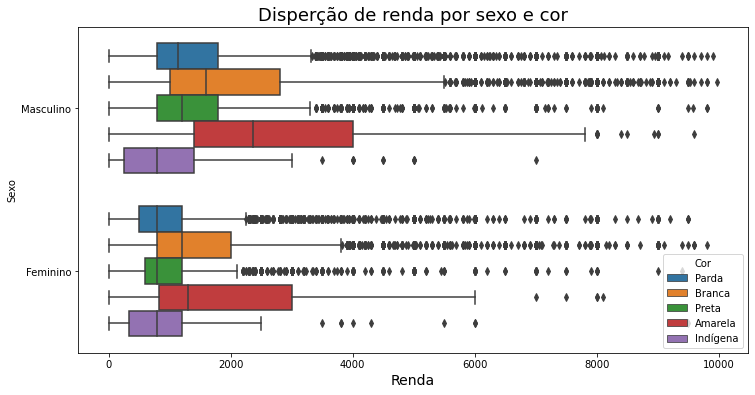

In [54]:
plot_renda = sns.boxplot(x='Renda', y='Sexo', orient='h', hue='Cor', data=renda)
plot_renda.figure.set_size_inches(12,6)
plot_renda.set_title('Disperção de renda por sexo e cor', fontsize=18)
plot_renda.set_xlabel('Renda', fontsize=14)
plot_renda

> ### Conclusões

Escreva suas conclusões aqui...

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [34]:
from scipy import stats

In [36]:
stats.percentileofscore(dados['Renda'], 788, kind='weak')

28.86777719937533

### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [39]:
dados['Renda'].quantile(q=0.99)

15000.0

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [45]:
renda_por_estudo = pd.crosstab(dados['Sexo'], dados['Anos de Estudo'], values=dados['Renda'], aggfunc={'mean','median','max','std'})
renda_por_estudo.rename(index=sexo, inplace=True)
renda_por_estudo.rename(columns=anos_de_estudo, inplace=True)
renda_por_estudo

max                             \
Anos de Estudo Sem instrução e menos de 1 ano    1 ano   2 anos   3 anos   
Sexo                                                                       
Masculino                             30000.0  30000.0  40000.0  80000.0   
Feminino                              10000.0   2000.0   4000.0   3500.0   

                                                                      ...  \
Anos de Estudo   4 anos   5 anos   6 anos   7 anos   8 anos   9 anos  ...   
Sexo                                                                  ...   
Masculino       50000.0  35000.0  25000.0  40000.0  30000.0  60000.0  ...   
Feminino        10000.0   8000.0   6000.0   9000.0  18000.0  20000.0  ...   

                        std                                         \
Anos de Estudo       7 anos       8 anos       9 anos      10 anos   
Sexo                                                                 
Masculino       1419.708673  1515.583715  2137.664774  2078.609734   
Feminino         602.038029   896.781213   973.221652   620.611907   

                                                                    \
Anos de Estudo      11 anos      12 anos      13 anos      14 anos   
Sexo                                                                 
Masculino       2676.538942  2268.081538  2797.116800  3987.214974   
Feminino        1819.040417  4851.833513  2053.789771  2064.083336   

                                                 
Anos de Estudo 15 anos ou mais Não determinados  
Sexo                                             
Masculino          7447.613594       979.648745  
Feminino           4212.770709       459.985964  

[2 rows x 68 columns]

In [46]:
#A média
renda_por_estudo['mean']

Anos de Estudo,Sem instrução e menos de 1 ano,1 ano,2 anos,3 anos,4 anos,5 anos,6 anos,7 anos,8 anos,9 anos,10 anos,11 anos,12 anos,13 anos,14 anos,15 anos ou mais,Não determinados
Sexo,,,,,,,,,,,,,,,,,
Masculino,799.494638,895.629047,931.178986,1109.203862,1302.329283,1338.653218,1448.875419,1465.497940,1639.396667,1508.03885,1731.270847,2117.060504,2470.330776,3195.099154,3706.620269,6134.279790,1295.761905
Feminino,516.201748,492.771987,529.911638,546.853916,704.279111,781.389776,833.732824,830.751004,933.615351,868.02170,925.919225,1286.790889,1682.313725,1911.730047,2226.460457,3899.513231,798.174419


In [47]:
#A mediana
renda_por_estudo['median']

Anos de Estudo,Sem instrução e menos de 1 ano,1 ano,2 anos,3 anos,4 anos,5 anos,6 anos,7 anos,8 anos,9 anos,10 anos,11 anos,12 anos,13 anos,14 anos,15 anos ou mais,Não determinados
Sexo,,,,,,,,,,,,,,,,,
Masculino,700.0,788.0,788.0,800.0,1000.0,1045.0,1200.0,1200.0,1300.0,1200.0,1218.0,1500.0,1800.0,2400.0,2500.0,4000.0,1200.0
Feminino,390.0,400.0,450.0,500.0,788.0,788.0,788.0,788.0,800.0,788.0,800.0,1000.0,1200.0,1300.0,1600.0,2800.0,788.0


In [48]:
#Valor máximo
renda_por_estudo['max']

Anos de Estudo,Sem instrução e menos de 1 ano,1 ano,2 anos,3 anos,4 anos,5 anos,6 anos,7 anos,8 anos,9 anos,10 anos,11 anos,12 anos,13 anos,14 anos,15 anos ou mais,Não determinados
Sexo,,,,,,,,,,,,,,,,,
Masculino,30000.0,30000.0,40000.0,80000.0,50000.0,35000.0,25000.0,40000.0,30000.0,60000.0,45000.0,200000.0,30000.0,25000.0,50000.0,200000.0,7000.0
Feminino,10000.0,2000.0,4000.0,3500.0,10000.0,8000.0,6000.0,9000.0,18000.0,20000.0,6000.0,100000.0,120000.0,20000.0,20000.0,100000.0,3000.0


In [49]:
#O desvio-padrão
renda_por_estudo['std']

Anos de Estudo,Sem instrução e menos de 1 ano,1 ano,2 anos,3 anos,4 anos,5 anos,6 anos,7 anos,8 anos,9 anos,10 anos,11 anos,12 anos,13 anos,14 anos,15 anos ou mais,Não determinados
Sexo,,,,,,,,,,,,,,,,,
Masculino,1023.904884,1331.950552,1435.173827,2143.800133,1419.821787,1484.650587,1476.628602,1419.708673,1515.583715,2137.664774,2078.609734,2676.538942,2268.081538,2797.116800,3987.214974,7447.613594,979.648745
Feminino,639.311534,425.291842,498.234168,424.124446,629.553397,635.782641,574.547028,602.038029,896.781213,973.221652,620.611907,1819.040417,4851.833513,2053.789771,2064.083336,4212.770709,459.985964


### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

<AxesSubplot:title={'center':'Disperção de renda por Anos de Estudo e Sexo'}, xlabel='Renda', ylabel='Anos de Estudo'>

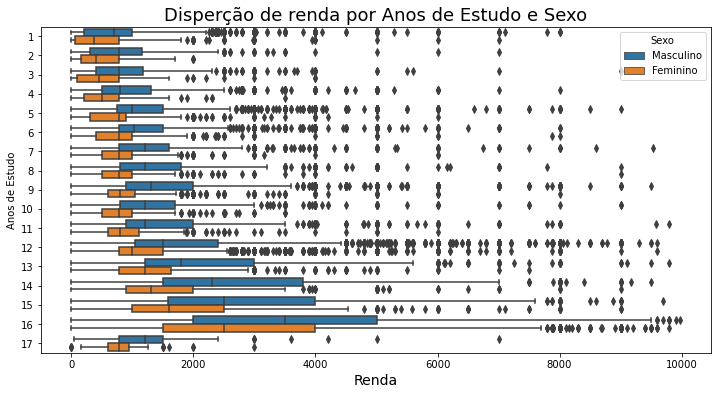

In [57]:
ax = sns.boxplot(x='Renda', y='Anos de Estudo', hue='Sexo', orient='h', data=renda)
ax.figure.set_size_inches(12,6)
ax.set_title('Disperção de renda por Anos de Estudo e Sexo', fontsize=18)
ax.set_xlabel('Renda', fontsize=14)
ax

<AxesSubplot:title={'center':'Disperção de renda por Anos de Estudo e Sexo em pessoas de 40 anos'}, xlabel='Renda', ylabel='Anos de Estudo'>

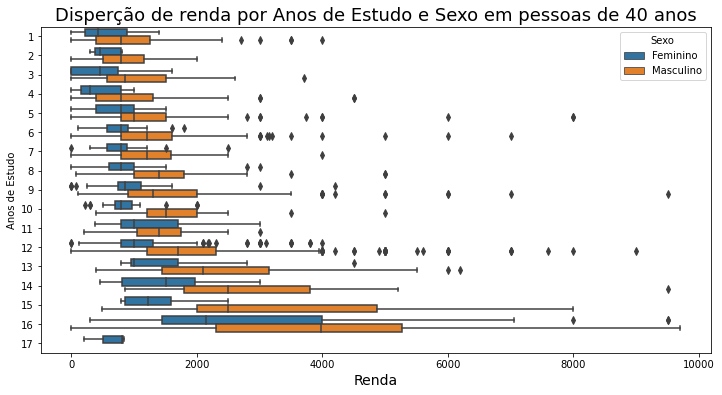

In [62]:
ax = sns.boxplot(x='Renda', y='Anos de Estudo', hue='Sexo', orient='h', data=renda.query('Idade == 40'))
ax.figure.set_size_inches(12,6)
ax.set_title('Disperção de renda por Anos de Estudo e Sexo em pessoas de 40 anos', fontsize=18)
ax.set_xlabel('Renda', fontsize=14)
ax

<AxesSubplot:title={'center':'Disperção de renda por Anos de Estudo e Sexo em pessoas com menos de 40 anos'}, xlabel='Renda', ylabel='Anos de Estudo'>

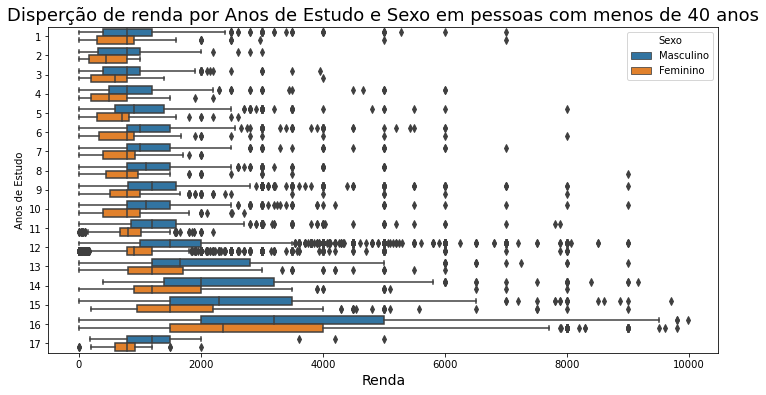

In [63]:
ax = sns.boxplot(x='Renda', y='Anos de Estudo', hue='Sexo', orient='h', data=renda.query('Idade < 40'))
ax.figure.set_size_inches(12,6)
ax.set_title('Disperção de renda por Anos de Estudo e Sexo em pessoas com menos de 40 anos', fontsize=18)
ax.set_xlabel('Renda', fontsize=14)
ax

> ### Conclusões

A maior distribuição de renda fica para pessoas com o maior nivel de estudos, contudo ainda conseguimos ver uma diferença entre o salario de mulher e homens!

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [65]:
renda_por_uf = dados.groupby(['UF']).agg({'Renda':{'mean','median','max','std'}})
renda_por_uf.rename(index=uf, inplace=True)
renda_por_uf

Renda                                  
                    median     max         mean          std
UF                                                          
Rondônia              1200   50000  1789.761223  2406.161161
Acre                   900   30000  1506.091782  2276.233415
Amazonas               900   22000  1445.130100  1757.935591
Roraima               1000   20000  1783.588889  2079.659238
Pará                   850   50000  1399.076871  2053.779555
Amapá                 1200   15580  1861.353516  2020.688632
Tocantins             1000   60000  1771.094946  2934.590741
Maranhão               700   30000  1019.432009  1887.816905
Piauí                  750   40000  1074.550784  2373.355726
Ceará                  789   25000  1255.403692  1821.963536
Rio Grande do Norte    800   15500  1344.721480  1651.805500
Paraíba                788   30000  1293.370487  1950.272431
Pernambuco             900   50000  1527.079319  2389.622497
Alagoas                788   11000  1144.552602  1237.856197
Sergipe                788   16000  1109.111111  1478.997878
Bahia                  800  200000  1429.645094  3507.917248
Minas Gerais          1200  100000  2056.432084  3584.721547
Espírito Santo        1274  100000  2026.383852  3513.846868
Rio de Janeiro        1400  200000  2496.403168  5214.583518
São Paulo             1600   80000  2638.104986  3503.777366
Paraná                1500  200000  2493.870753  4302.937995
Santa Catarina        1800   80000  2470.854945  3137.651112
Rio Grande do Sul     1500   35000  2315.158336  2913.335783
Mato Grosso do Sul    1500   42000  2262.604167  3031.419122
Mato Grosso           1500   35000  2130.652778  2542.630178
Goiás                 1500   30000  1994.580794  2221.933065
Distrito Federal      2000  100000  4241.954722  5550.463338

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

In [66]:
renda['UF'] = [uf[i] for i in renda['UF']]
renda.head()

<ipython-input-66-6ca3f51775ea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  renda['UF'] = [uf[i] for i in renda['UF']]


,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,Rondônia,Masculino,23,Parda,12,800,1.603808
1,Rondônia,Feminino,23,Branca,12,1150,1.739790
2,Rondônia,Feminino,35,Parda,15,880,1.760444
3,Rondônia,Masculino,46,Branca,6,3500,1.783158
4,Rondônia,Feminino,47,Parda,9,150,1.690631


<AxesSubplot:title={'center':'Distribuição de Renda por UF'}, xlabel='Renda', ylabel='UF'>

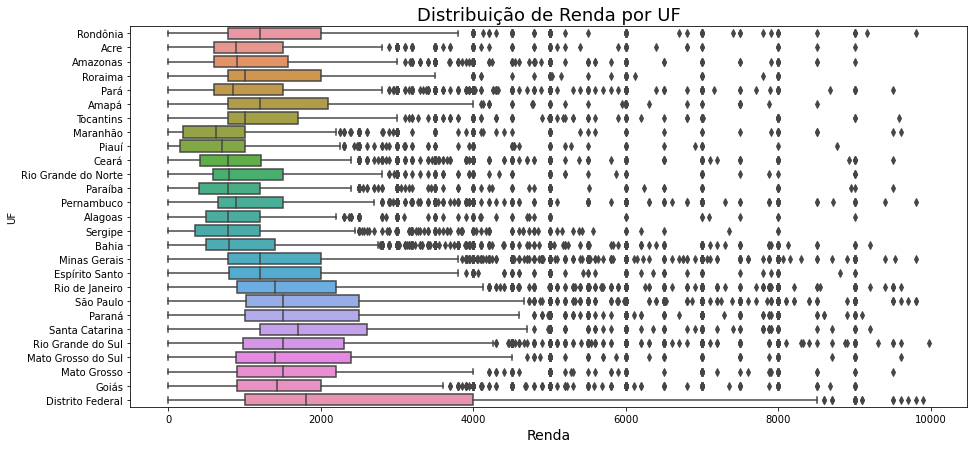

In [70]:
ax = sns.boxplot(x='Renda', y='UF', orient='h', data=renda)
ax.figure.set_size_inches(15,7)
ax.set_title('Distribuição de Renda por UF', fontsize=18)
ax.set_xlabel('Renda', fontsize=14)
ax

> ### Conclusões

Os maiores salarial esta no Distrito Federal
Os menos estão no Piauí seguindo do Maranhão